In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=yf.download('RELIANCE.NS', start='2019-1-1', end='2023-2-28')
reliance = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [3]:
reliance.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1028.852905,1030.727295,1015.000732,1024.966919,1004.360291,4873335
2019-01-02,1019.023804,1030.453003,1006.680298,1011.617737,991.279480,7814409
2019-01-03,1012.623474,1019.115234,996.714111,999.137085,979.049805,8144143
2019-01-04,1003.388733,1009.834778,988.485107,1004.531616,984.335815,9258272
2019-01-07,1012.166321,1022.635437,1006.680298,1010.109070,989.801147,6030145
2019-01-08,1010.429077,1014.863586,1002.108643,1010.017639,989.711487,6152194
2019-01-09,1016.737976,1021.309631,1004.577332,1015.595093,995.176880,6307118
2019-01-10,1012.852051,1015.823669,1008.508972,1012.623474,992.264954,4462580
2019-01-11,1012.714905,1018.383789,995.342590,1003.983032,983.798218,7069530


In [4]:
reliance.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-14,2150.543213,2198.492920,2144.728271,2194.985596,2187.259277,7160960
2023-02-15,2193.047119,2249.534912,2190.278320,2244.688965,2236.787598,16751795
2023-02-16,2260.841553,2274.086670,2238.320312,2242.935303,2235.040039,8632243
2023-02-17,2233.659180,2259.041748,2224.982910,2252.303711,2244.375488,5904760
2023-02-20,2256.734131,2261.118408,2224.521484,2228.490479,2220.646240,4418468
2023-02-21,2237.351318,2258.395508,2226.598145,2246.673584,2238.765381,6655796
2023-02-22,2239.151123,2242.889160,2192.170410,2195.723877,2187.994873,5512167
2023-02-23,2194.893311,2210.353516,2179.525391,2185.201660,2177.509766,4925955
2023-02-24,2189.355225,2211.645752,2185.663330,2200.154297,2192.409668,4717026


In [5]:
# Removing "Adj Close" columnfrom dataset
reliance=reliance.drop(["Adj Close"],axis=1)
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,1028.852905,1030.727295,1015.000732,1024.966919,4873335
2019-01-02,1019.023804,1030.453003,1006.680298,1011.617737,7814409
2019-01-03,1012.623474,1019.115234,996.714111,999.137085,8144143
2019-01-04,1003.388733,1009.834778,988.485107,1004.531616,9258272
2019-01-07,1012.166321,1022.635437,1006.680298,1010.109070,6030145
...,...,...,...,...,...
2023-02-21,2237.351318,2258.395508,2226.598145,2246.673584,6655796
2023-02-22,2239.151123,2242.889160,2192.170410,2195.723877,5512167
2023-02-23,2194.893311,2210.353516,2179.525391,2185.201660,4925955


In [6]:
# Finding duplicate columns, if any
reliance.duplicated().sum()

0

In [7]:
# Finding null values, if any
reliance.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1030 entries, 2019-01-01 to 2023-02-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1030 non-null   float64
 1   High    1030 non-null   float64
 2   Low     1030 non-null   float64
 3   Close   1030 non-null   float64
 4   Volume  1030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.3 KB


In [9]:
reliance.describe()

,Open,High,Low,Close,Volume
count,1030.000000,1030.000000,1030.000000,1030.000000,1.030000e+03
mean,1816.015278,1836.695932,1793.877793,1814.308620,1.114707e+07
std,474.851854,478.189661,471.248652,474.696630,8.498978e+06
min,837.711609,868.616089,800.635437,808.315857,8.528280e+05
25%,1328.685425,1345.170929,1314.960785,1324.653503,6.077187e+06
50%,1918.339417,1934.076599,1884.396179,1912.316895,8.638434e+06
75%,2240.097229,2260.080139,2216.306824,2234.801392,1.280999e+07
max,2636.225586,2636.225586,2571.569336,2602.720703,7.134168e+07


In [10]:
reliance.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999002,0.999015,0.997938,-0.273382
High,0.999002,1.000000,0.998804,0.999240,-0.255679
Low,0.999015,0.998804,1.000000,0.999146,-0.286423
Close,0.997938,0.999240,0.999146,1.000000,-0.269724
Volume,-0.273382,-0.255679,-0.286423,-0.269724,1.000000


Every attributes are highly corelated except volume

**VISUALIZATIONS**

In [11]:
sns.set_style(style='darkgrid')

Text(0.5, 1.0, 'Low')

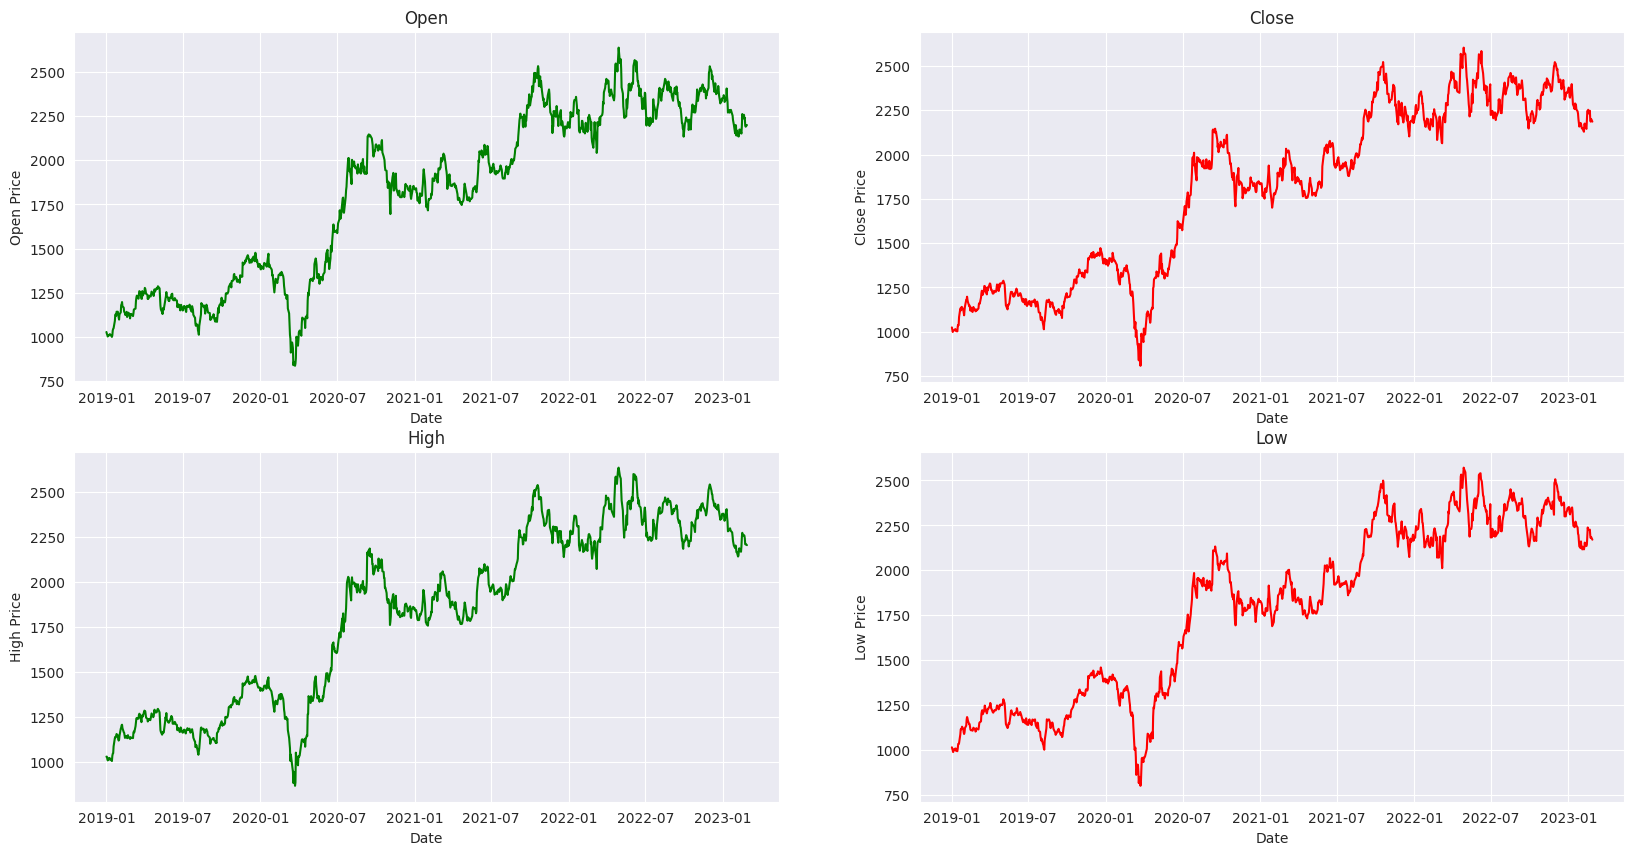

In [13]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(reliance['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(reliance['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

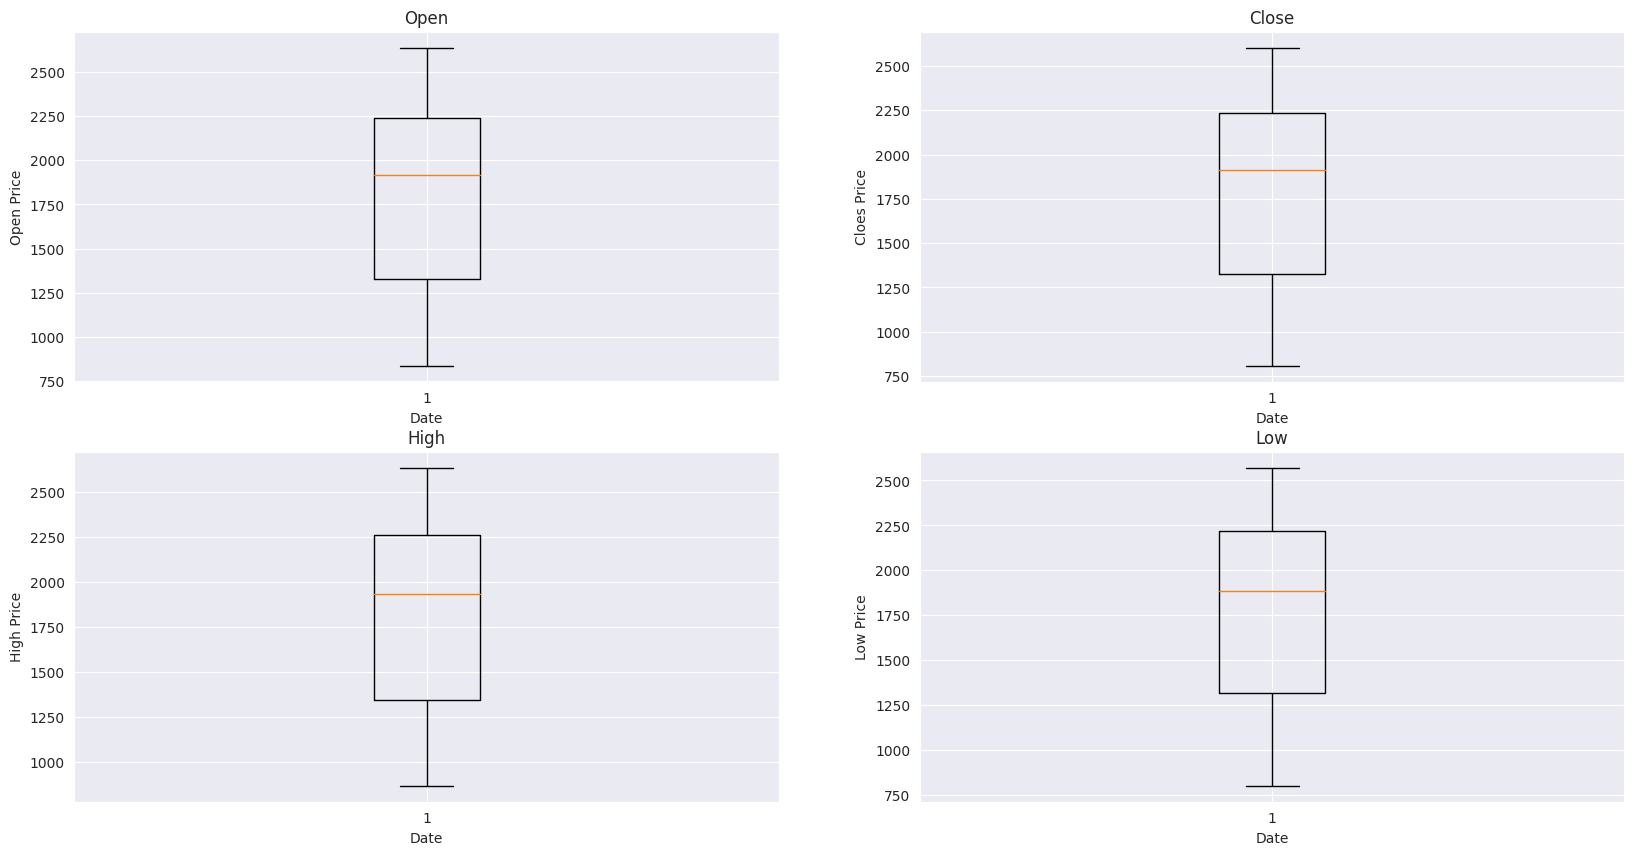

In [14]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(reliance['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(reliance['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

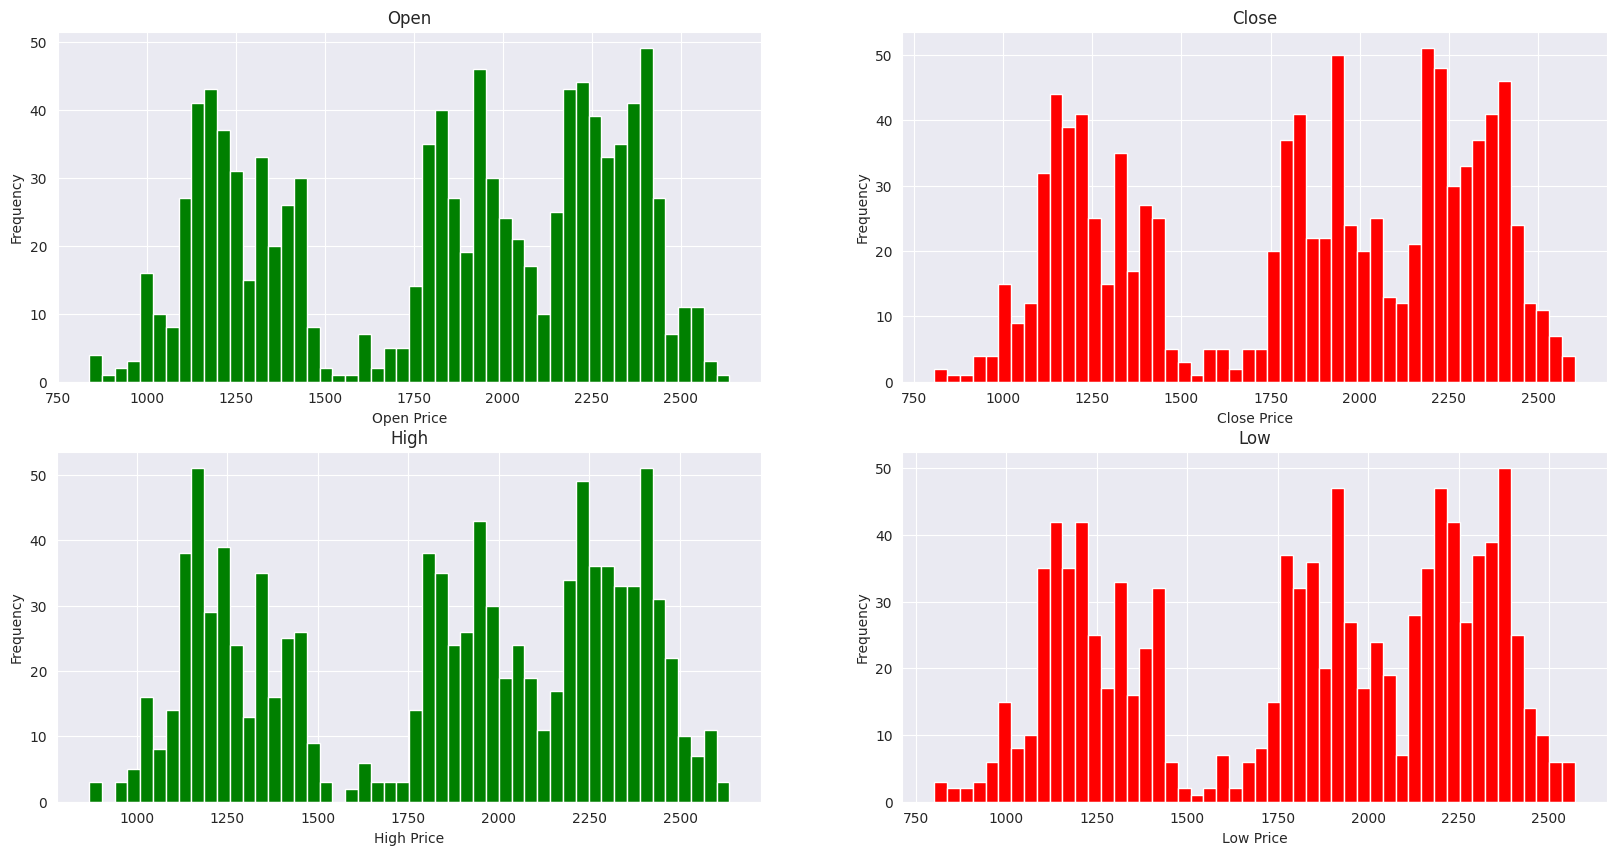

In [15]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

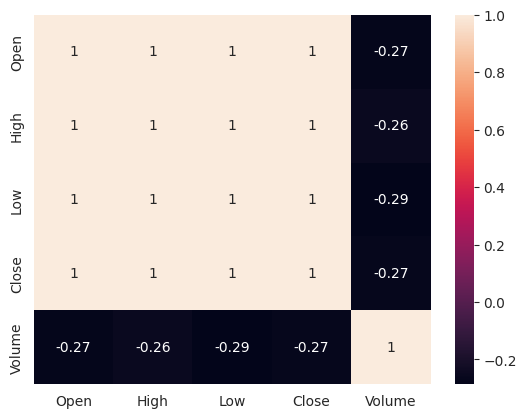

In [16]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

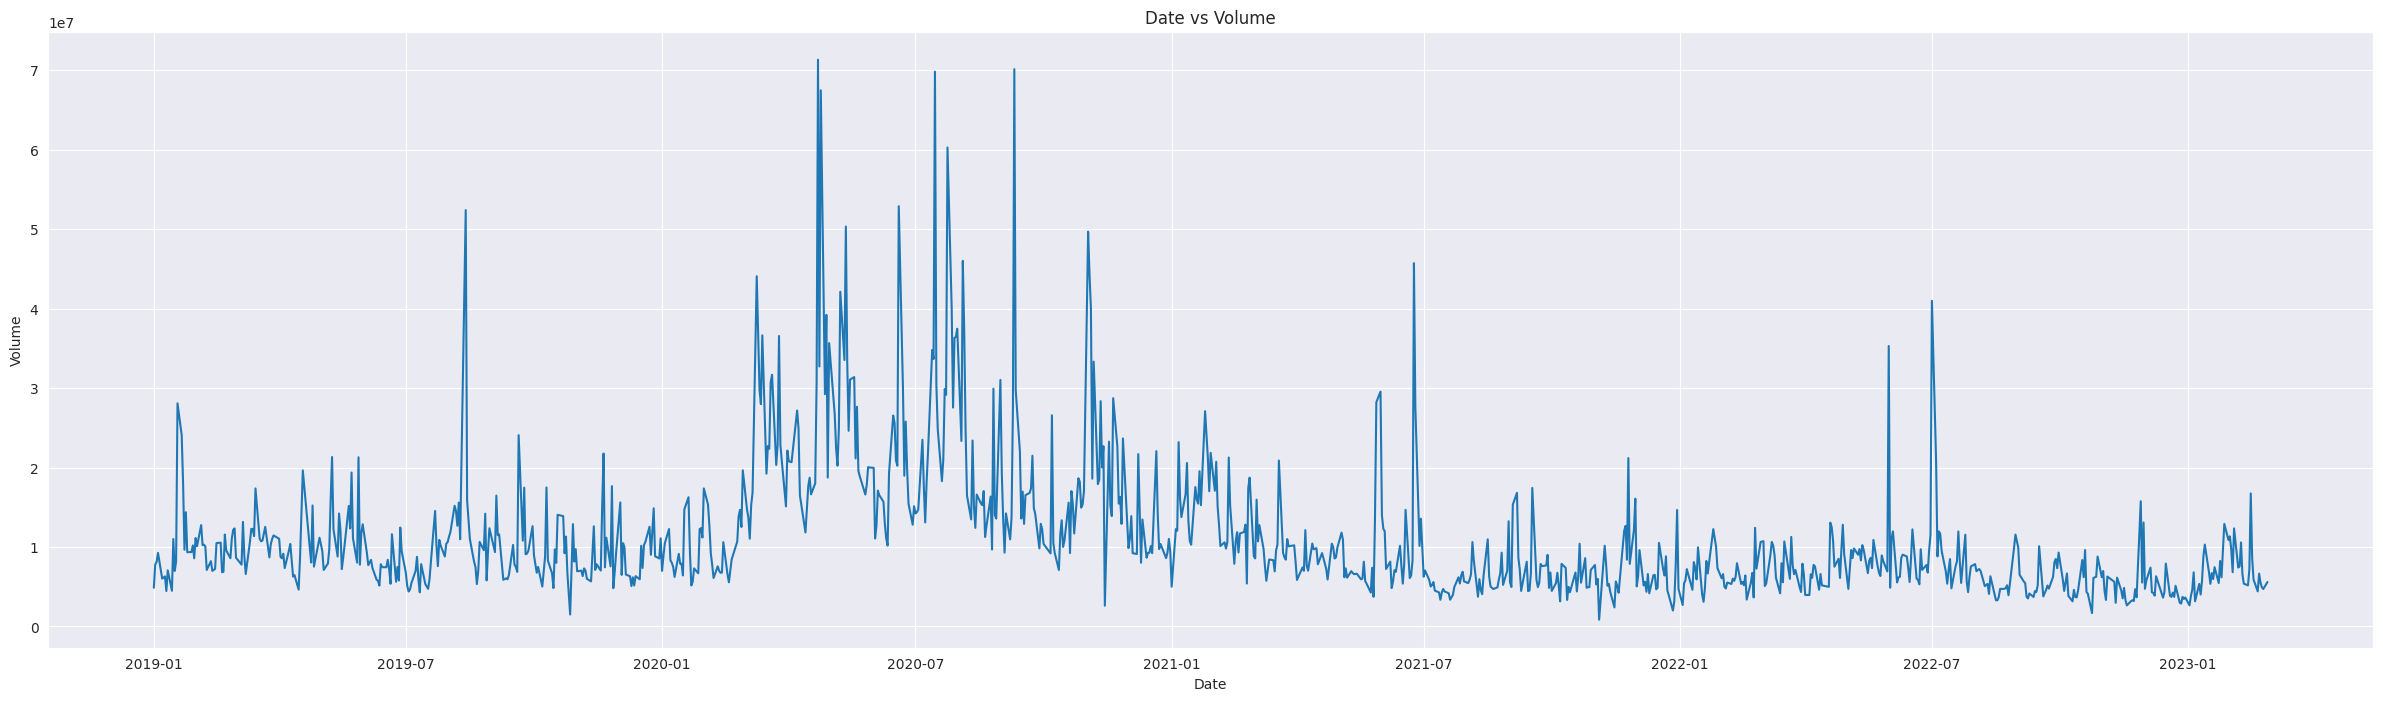

In [17]:
figure=plt.figure(figsize=(30,8))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

In [18]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['100-day MA']=reliance['Close'].rolling(window=100).mean()

In [19]:
reliance_ma

,Open,High,Low,Close,Volume,30-day MA,100-day MA
Date,,,,,,,
2019-01-01,1028.852905,1030.727295,1015.000732,1024.966919,4873335,NaN,NaN
2019-01-02,1019.023804,1030.453003,1006.680298,1011.617737,7814409,NaN,NaN
2019-01-03,1012.623474,1019.115234,996.714111,999.137085,8144143,NaN,NaN
2019-01-04,1003.388733,1009.834778,988.485107,1004.531616,9258272,NaN,NaN
2019-01-07,1012.166321,1022.635437,1006.680298,1010.109070,6030145,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-21,2237.351318,2258.395508,2226.598145,2246.673584,6655796,2219.069678,2311.379485
2023-02-22,2239.151123,2242.889160,2192.170410,2195.723877,5512167,2213.547062,2311.874211
2023-02-23,2194.893311,2210.353516,2179.525391,2185.201660,4925955,2208.665926,2311.779602


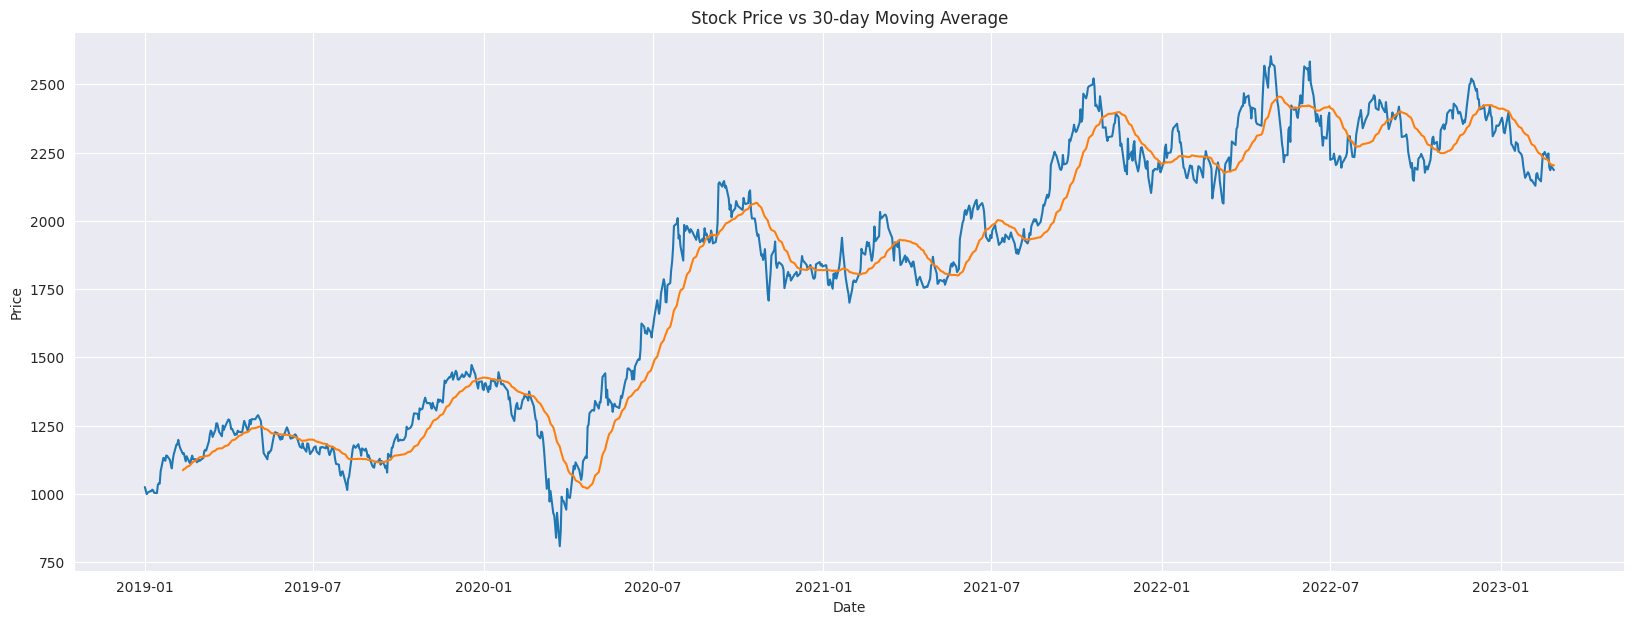

In [20]:
plt.figure(figsize=(20,7))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

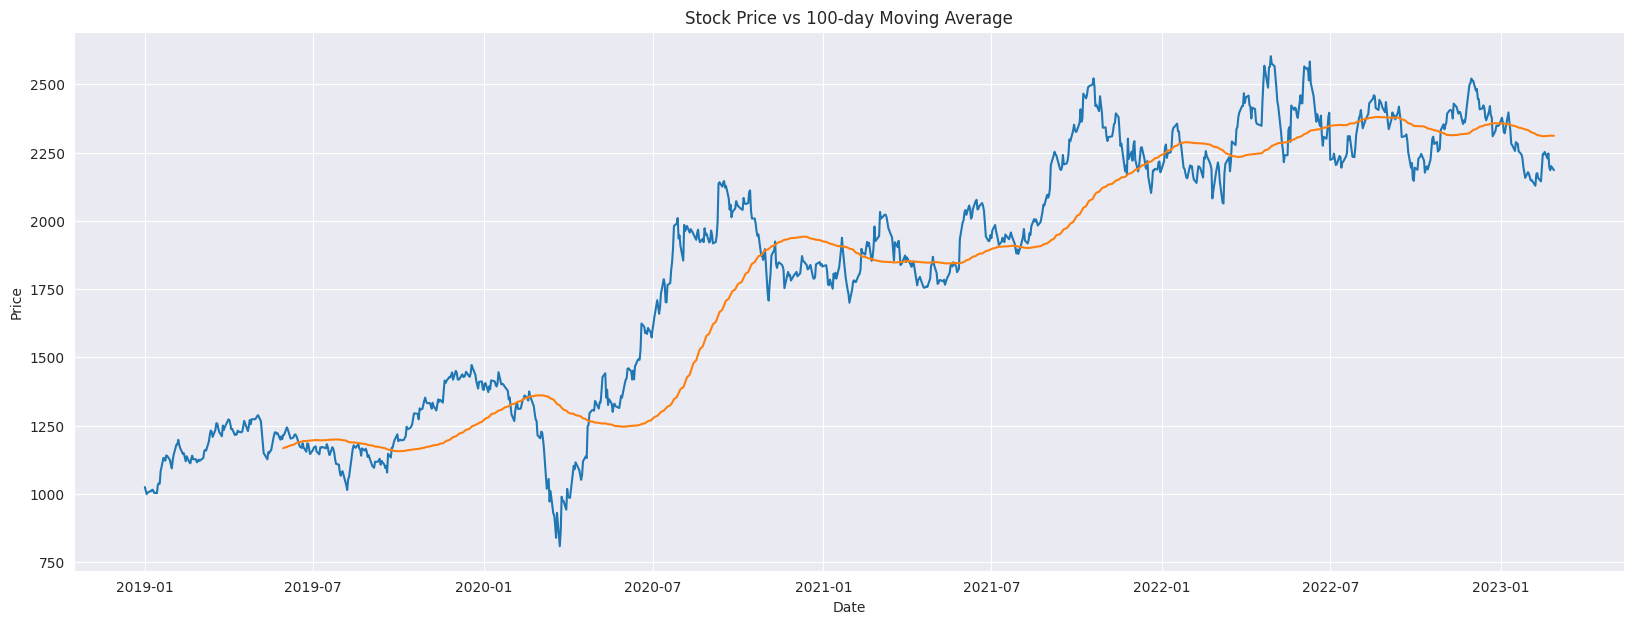

In [21]:
plt.figure(figsize=(20,7))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['100-day MA'],label='100-MA')
plt.legend
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px

In [23]:
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,1028.852905,1030.727295,1015.000732,1024.966919,4873335
2019-01-02,1019.023804,1030.453003,1006.680298,1011.617737,7814409
2019-01-03,1012.623474,1019.115234,996.714111,999.137085,8144143
2019-01-04,1003.388733,1009.834778,988.485107,1004.531616,9258272
2019-01-07,1012.166321,1022.635437,1006.680298,1010.109070,6030145
...,...,...,...,...,...
2023-02-21,2237.351318,2258.395508,2226.598145,2246.673584,6655796
2023-02-22,2239.151123,2242.889160,2192.170410,2195.723877,5512167
2023-02-23,2194.893311,2210.353516,2179.525391,2185.201660,4925955


In [24]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(reliance['Close'])
close_df

,Close
Date,
2019-01-01,1024.966919
2019-01-02,1011.617737
2019-01-03,999.137085
2019-01-04,1004.531616
2019-01-07,1010.109070
...,...
2023-02-21,2246.673584
2023-02-22,2195.723877
2023-02-23,2185.201660


In [25]:
print(close_df.shape)

(1030, 1)


In [26]:
close_df=close_df.reset_index()

In [27]:
close_df['Date']

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-07
          ...    
1025   2023-02-21
1026   2023-02-22
1027   2023-02-23
1028   2023-02-24
1029   2023-02-27
Name: Date, Length: 1030, dtype: datetime64[ns]

In [28]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(1030, 1)


In [29]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (885, 1)
test_data:  (145, 1)


In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (871, 13)
y_train:  (871,)
X_test:  (131, 13)
y_test (131,)


In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (871, 13, 1)
X_test:  (131, 13, 1)


In [33]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
28/28 [==============================] - 7s 48ms/step - loss: 0.0770 - val_loss: 0.0295
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 3/100
28/28 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 4/100
28/28 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/100
28/28 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 9/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 10/100
28/28 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 0.0016


In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 5ms/step


((871, 1), (131, 1))

In [37]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [40]:
# Evaluation metrices RMSE and MAE
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  44.77956944680673
Train data MSE:  2005.2098398413873
Test data MAE:  33.608829327483676
-------------------------------------------------------------------------------------
Test data RMSE:  36.26160810785386
Test data MSE:  1314.9042225675728
Test data MAE:  29.414028953959924


In [41]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9903792367914673
Test data explained variance regression score: 0.865922736658458


In [42]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9902785674636303
Test data R2 score: 0.865003499357048


In [43]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1030, 1)
Test predicted data:  (1030, 1)


In [44]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [45]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [53]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [54]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()